In [223]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
import numpy as np
from pycm import *

In [224]:
Results = pd.read_csv("Models3.csv",converters={'CM_Train': pd.eval, 'CM_Test': pd.eval})
Results.drop("Unnamed: 0",axis=1,inplace=True)

In [225]:
New=Results["DataSetName"].str.split("_",expand=True).iloc[:,0:2]
New.columns=["Mel_number","Data_Size"]
Results = pd.concat([Results,New],axis=1)
Results.drop("DataSetName",axis=1,inplace=True)
Results["Data_Size"]=Results["Data_Size"].astype("int32")

In [226]:
Results

,Model_Path,train_acc_Best_Eb,vali_acc_Best_Eb,train_acc_All,test_acc_All,CM_Test,CM_Train,Mel_number,Data_Size
0,VGG_Mel128_50_M_2812_13344,0.912850,0.779359,0.969764,0.812057,"[44, 1, 0, 0, 0, 0, 2, 0, 35, 0, 1, 2, 1, 0, 0...","[322, 0, 0, 2, 0, 0, 0, 0, 339, 0, 2, 1, 0, 0,...",Mel128,50
1,VGG_Mel128_100_M_5730_37664,0.942627,0.811518,0.957243,0.825480,"[75, 0, 0, 0, 0, 0, 10, 0, 91, 3, 0, 3, 1, 0, ...","[665, 0, 0, 0, 0, 0, 10, 0, 688, 9, 1, 10, 1, ...",Mel128,100
2,VGG_Mel128_200_M_12088_27801,0.886763,0.850289,0.937435,0.851944,"[198, 0, 0, 0, 0, 0, 16, 2, 153, 3, 5, 14, 3, ...","[1579, 0, 1, 0, 0, 0, 68, 1, 1394, 8, 22, 62, ...",Mel128,200


# Over All Classes

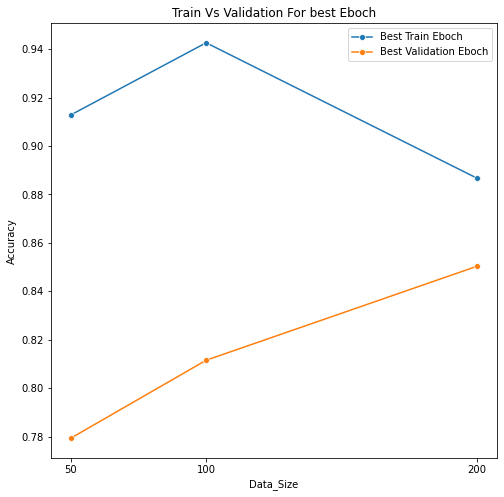

In [227]:
g= sns.lineplot(x = "Data_Size", y = "train_acc_Best_Eb", data=Results, marker="o", label="Best Train Eboch")
sns.lineplot(x = "Data_Size", y = "vali_acc_Best_Eb", data=Results, marker="o", label="Best Validation Eboch")


g.set_xticks(Results.Data_Size.values) 

plt.ylabel("Accuracy")
plt.title("Train Vs Validation For best Eboch")
plt.show()

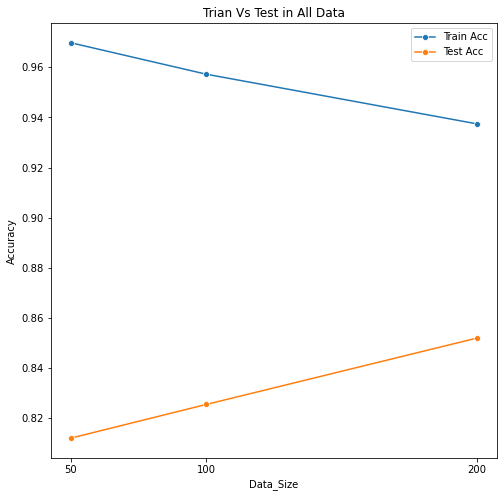

In [228]:

g= sns.lineplot(x = "Data_Size", y = "train_acc_All", data=Results, marker="o", label="Train Acc")
sns.lineplot(x = "Data_Size", y = "test_acc_All", data=Results, marker="o", label="Test Acc")


g.set_xticks(Results.Data_Size.values) 

plt.ylabel("Accuracy")
plt.title("Trian Vs Test in All Data")
plt.show()

## Calcaulte Metrics for Each class

In [229]:
classes = [(0, 'ar'), (1, 'de'), (2, 'en'), (3, 'es'), (4, 'fr'), (5, 'it'), (6, 'pt')]

In [230]:
classes = ['ar','de', 'en','es', 'fr', 'it','pt' ]

In [231]:
CM= np.array(Results.loc[0,"CM_Test"]).reshape((7,7)).astype("int32")

In [232]:
cm = ConfusionMatrix(matrix=CM)

c:\Users\mm\anaconda3\lib\site-packages\pycm\pycm_overall_func.py:333: RuntimeWarning: overflow encountered in long_scalars
  return cov_x_y / (math.sqrt(cov_y_y * cov_x_x))


Data_Size : 50
    
for class 0: recall 0.9362, specificity 0.983            precision 0.9167, f1 0.9263
for class 1: recall 0.8974, specificity 0.9095            precision 0.614, f1 0.7292
for class 2: recall 0.7447, specificity 0.983            precision 0.8974, f1 0.814
for class 3: recall 0.9, specificity 0.9628            precision 0.8, f1 0.8471
for class 4: recall 0.6279, specificity 0.9749            precision 0.8182, f1 0.7105
for class 5: recall 0.7419, specificity 0.9801            precision 0.8214, f1 0.7797

___________________________________________

Data_Size : 100
    
for class 0: recall 0.8824, specificity 0.9775            precision 0.8721, f1 0.8772
for class 1: recall 0.9286, specificity 0.9537            precision 0.8053, f1 0.8626
for class 2: recall 0.7821, specificity 0.9838            precision 0.8841, f1 0.8299
for class 3: recall 0.9872, specificity 0.9556            precision 0.7778, f1 0.8701
for class 4: recall 0.65, specificity 0.9777            precisi

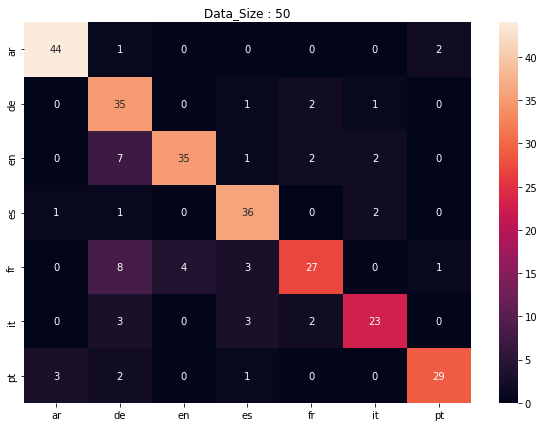

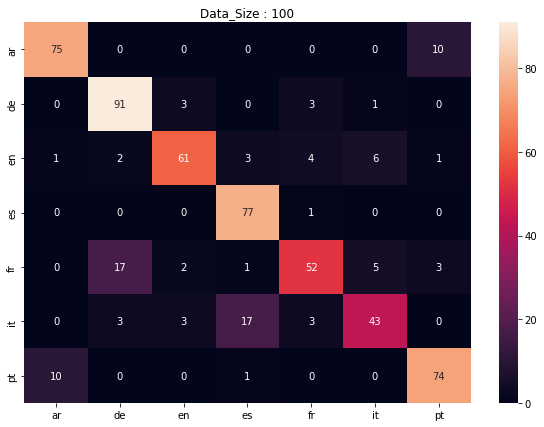

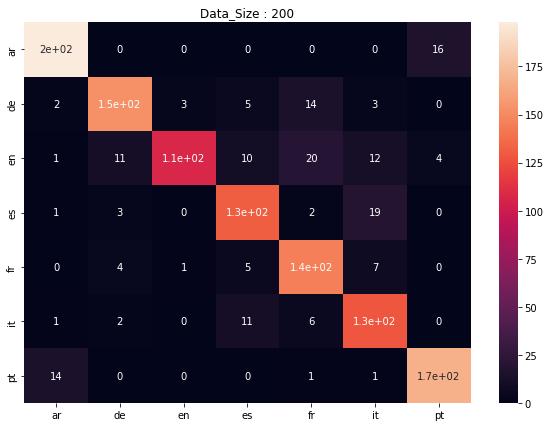

In [233]:
n_classes=6
ds= []

for Size in Results["Data_Size"].values:
    print(f"Data_Size : {Size}")
    print("    ")
    cm = np.array(Results.loc[Results["Data_Size"]==Size,"CM_Test"])[0].reshape((7,7)).astype("int32")
    for c in range(n_classes):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))

        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        

        #print(f"for class {c}: acc {accuracy}, recall {recall},\
        #      precision {precision}, f1 {f1_score}")
        print("for class {}: recall {}, specificity {}\
            precision {}, f1 {}".format(c,round(recall,4), round(specificity,4), round(precision,4),round(f1_score,4)))


        ds.append([Size, classes[c], recall, specificity, precision, f1_score  ])
    
    print("")
    print("___________________________________________")
    print("")

    df_cm = pd.DataFrame(cm, index = [i for i in classes],
                  columns = [i for i in classes])
    plt.figure(figsize = (10,7))
    plt.title(f"Data_Size : {Size}")
    sns.heatmap(df_cm, annot=True)

df_df= pd.DataFrame(ds,columns = ["Data_size","Lang","recall","specificity","precision","f1_score"])

In [234]:
df_df

,Data_size,Lang,recall,specificity,precision,f1_score
0,50,ar,0.936170,0.982979,0.916667,0.926316
1,50,de,0.897436,0.909465,0.614035,0.729167
2,50,en,0.744681,0.982979,0.897436,0.813953
3,50,es,0.900000,0.962810,0.800000,0.847059
4,50,fr,0.627907,0.974895,0.818182,0.710526
5,50,it,0.741935,0.980080,0.821429,0.779661
6,100,ar,0.882353,0.977459,0.872093,0.877193
7,100,de,0.928571,0.953684,0.805310,0.862559
8,100,en,0.782051,0.983838,0.884058,0.829932
9,100,es,0.987179,0.955556,0.777778,0.870056


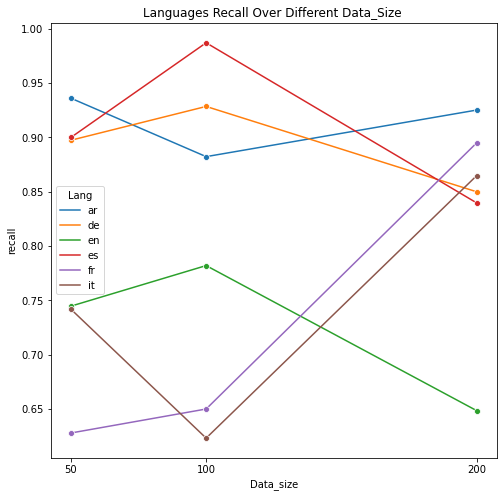

In [235]:
g= sns.lineplot(x = "Data_size", y = "recall", data=df_df, marker="o", hue="Lang")


g.set_xticks(Results.Data_Size.values) 

plt.ylabel("recall")
plt.title("Languages Recall Over Different Data_Size ")
plt.show()

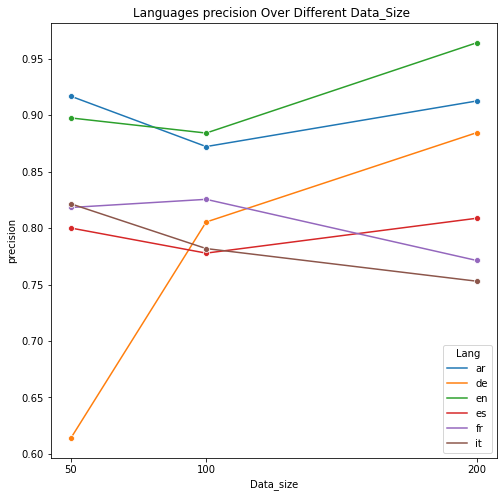

In [236]:
g= sns.lineplot(x = "Data_size", y = "precision", data=df_df, marker="o", hue="Lang")


g.set_xticks(Results.Data_Size.values) 

plt.ylabel("precision")
plt.title("Languages precision Over Different Data_Size ")
plt.show()